In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix

In [2]:
# Carica il dataset
file_path = 'data\dataset_for_topic_labeling.xlsx'
df = pd.read_excel(file_path)
df_filtered = df[df['topic'].notna()]
df_filtered = df_filtered[df_filtered['reply'].isna()]
df_filtered = df_filtered[df_filtered['topic'] != '3. Studyplan']
df_filtered = df_filtered[df_filtered['text'].notna()]

df_filtered.reset_index(drop=True, inplace=True)

In [4]:
# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']

# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

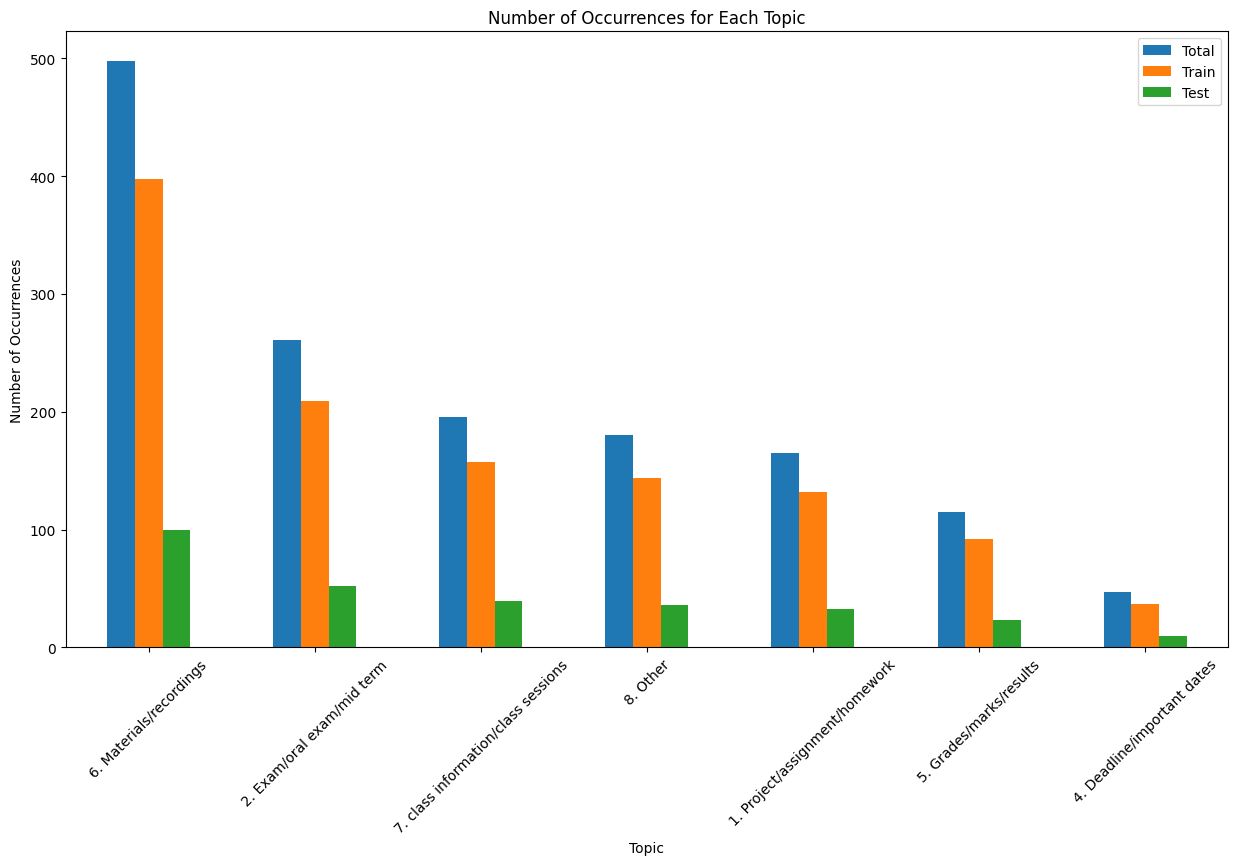

In [4]:
# Conta le occorrenze dei topic nel dataset completo, nel train set e nel test set
topic_counts = df_filtered['topic'].value_counts()
topic_counts_train = y_train.value_counts()
topic_counts_test = y_test.value_counts()

# Crea un dataframe per facilitare la visualizzazione
topic_counts_df = pd.DataFrame({
    'Total': topic_counts,
    'Train': topic_counts_train,
    'Test': topic_counts_test
}).fillna(0)

# Visualizza le occorrenze dei topic su un grafico
topic_counts_df.plot(kind='bar', figsize=(15, 8))
plt.title('Number of Occurrences for Each Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

In [7]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

overall_precision_test = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall_test = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1_test = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy_test = accuracy_score(y_test, y_pred)

# Stampa i risultati per il test set
print(f"Test Set - Overall Precision: {overall_precision_test}")
print(f"Test Set - Overall Recall: {overall_recall_test}")
print(f"Test Set - Overall F1-score: {overall_f1_test}")
print(f"Test Set - Accuracy: {accuracy_test}")

# Valuta il modello
print(classification_report(y_test, y_pred))


Test Set - Overall Precision: 0.6567770034843206
Test Set - Overall Recall: 0.2548658587789022
Test Set - Overall F1-score: 0.25929859814014067
Test Set - Accuracy: 0.447098976109215
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.88      0.21      0.34        33
         2. Exam/oral exam/mid term       0.52      0.25      0.34        52
        4. Deadline/important dates       0.00      0.00      0.00        10
            5. Grades/marks/results       1.00      0.04      0.08        23
            6. Materials/recordings       0.40      0.99      0.57       100
7. class information/class sessions       0.80      0.21      0.33        39
                           8. Other       1.00      0.08      0.15        36

                           accuracy                           0.45       293
                          macro avg       0.66      0.25      0.26       293
                       weighted avg       0.6

c:\Users\asus-zen\anaconda3\envs\BERT\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus-zen\anaconda3\envs\BERT\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus-zen\anaconda3\envs\BERT\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c

In [22]:
print(X_test_tfidf.shape)

(293, 2458)


In [18]:
print(X_test[1])

Does anyone still have a spot for the requirements and design project?


In [27]:
print(X_test_tfidf[1])

  (0, 2420)	0.3087244169645954
  (0, 2364)	0.19990467490477773
  (0, 2349)	0.4575645868774049
  (0, 2211)	0.13286354417658489
  (0, 2191)	0.2003953586616446
  (0, 2168)	0.08707991331143275
  (0, 1996)	0.21991632823447216
  (0, 1974)	0.4575645868774049
  (0, 1370)	0.30078964977442785
  (0, 1130)	0.1875377368473662
  (0, 1036)	0.1535499302324262
  (0, 1026)	0.17825612686878614
  (0, 988)	0.19611289026889175
  (0, 656)	0.18556705793354605
  (0, 145)	0.27990442370231516


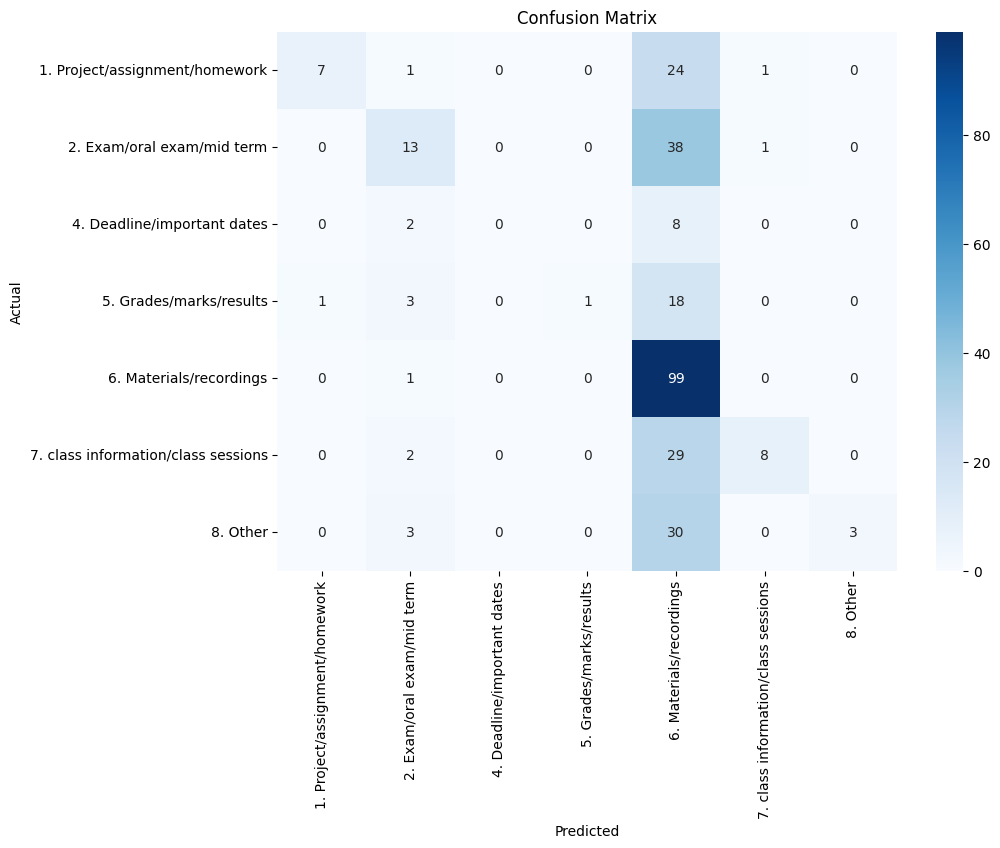

In [28]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizza la confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']

# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#TF-IDF with bi-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#SVM model with Hyperparameters grid research
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_tfidf, y_train)

y_pred = grid.predict(X_test_tfidf)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01,

In [30]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.597837876409305
Overall Recall: 0.5474589661546184
Overall F1-score: 0.5595944461107899
Accuracy: 0.6313993174061433
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.81      0.64      0.71        33
         2. Exam/oral exam/mid term       0.56      0.71      0.63        52
        4. Deadline/important dates       0.33      0.10      0.15        10
            5. Grades/marks/results       0.71      0.65      0.68        23
            6. Materials/recordings       0.66      0.73      0.70       100
7. class information/class sessions       0.64      0.64      0.64        39
                           8. Other       0.46      0.36      0.41        36

                           accuracy                           0.63       293
                          macro avg       0.60      0.55      0.56       293
                       weighted avg       0.63      0.63      0.62       293



In [32]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


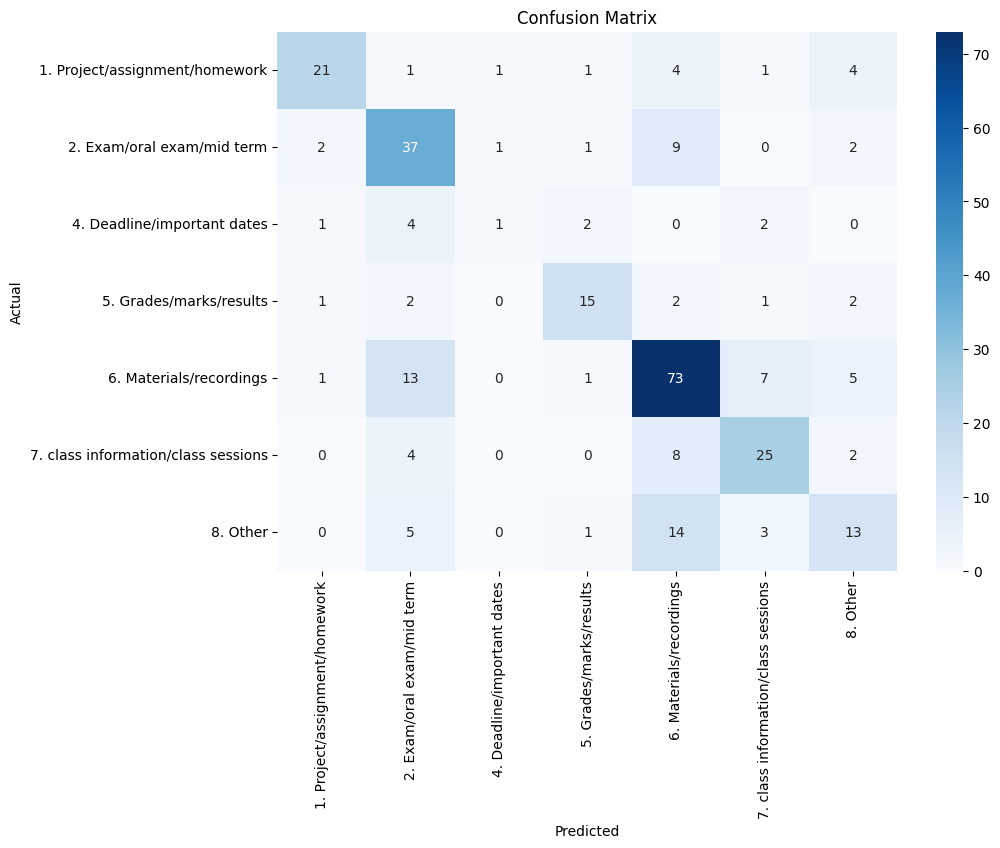

In [31]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizza la confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Method 3

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']

# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Trasforma il testo in vettori TF-IDF con bi-grams e tri-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Bilanciamento delle classi con SMOTE
smote = SMOTE(random_state=42)
#X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)


# Stampa il report di classificazione e la matrice di confusione


In [51]:
# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']


In [52]:

# Funzione di preprocessing del testo
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Applica il preprocessing al testo
X = X.apply(preprocess_text)




# Stampa il report di classificazione e la matrice di confusione

In [53]:
# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Trasforma il testo in vettori TF-IDF con bi-grams e tri-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Bilanciamento delle classi con SMOTE
smote = SMOTE(random_state=42)
#X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

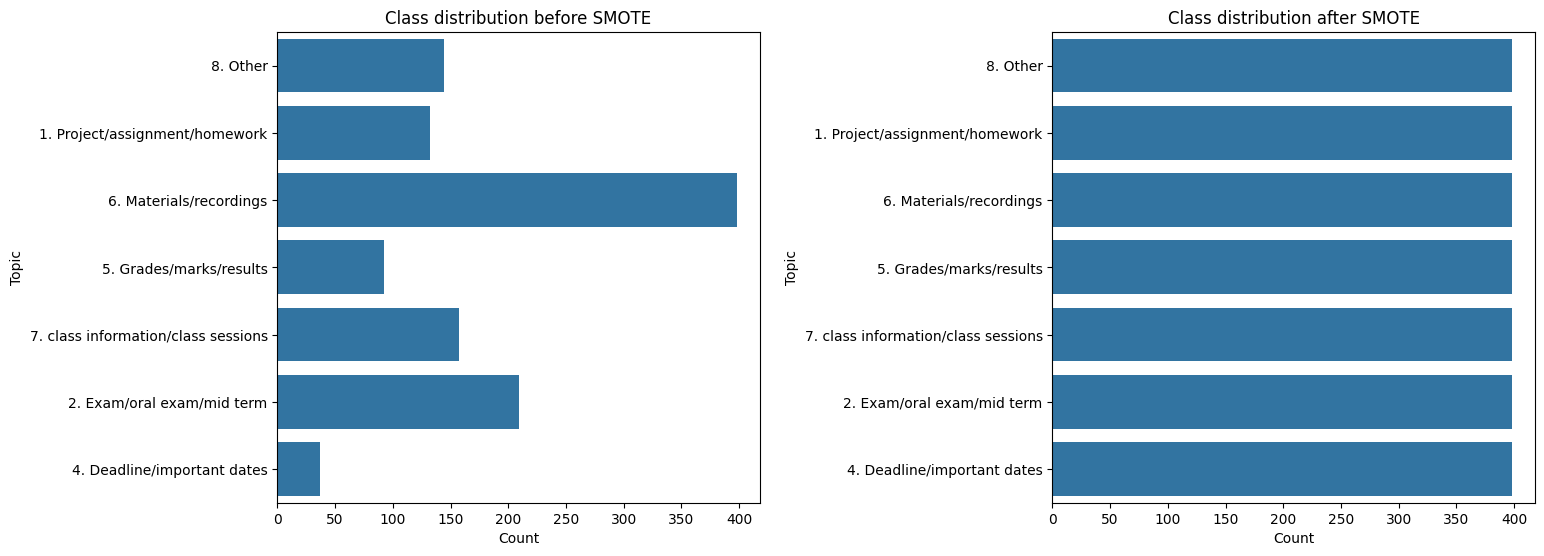

Esempi di campioni sintetici generati da SMote:
Synthetic Sample 1 - Topic: 8. Other
Synthetic Sample 14 - Topic: 6. Materials/recordings
Synthetic Sample 20 - Topic: 5. Grades/marks/results
Synthetic Sample 21 - Topic: 8. Other
Synthetic Sample 37 - Topic: 6. Materials/recordings


In [46]:
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Visualizza la distribuzione delle classi prima e dopo SMOTE
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
fig.tight_layout(pad=18.0)  # Adjust the padding between and around subplots

sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Class distribution before SMOTE')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Topic')

sns.countplot(y_train_res, ax=ax[1])
ax[1].set_title('Class distribution after SMOTE')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Topic')

plt.show()

# Identifica gli indici dei campioni sintetici
original_samples = set(y_train.index)
resampled_samples = set(range(len(y_train_res)))
synthetic_samples = list(resampled_samples - original_samples)

# Visualizza alcuni esempi di campioni sintetici
num_examples = 5
print("Esempi di campioni sintetici generati da SMote:")
for idx in synthetic_samples[:num_examples]:
    print(f"Synthetic Sample {idx} - Topic: {y_train_res[idx]}")

In [47]:
# Definisci il modello SVM con ricerca a griglia per ottimizzare gli iperparametri
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_train_tfidf_res, y_train_res)

# Fai previsioni sul set di test
y_pred = grid.predict(X_test_tfidf)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [48]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [49]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.5470022525912884
Overall Recall: 0.5372909698996656
Overall F1-score: 0.5390294233452652
Accuracy: 0.621160409556314
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.79      0.67      0.72        33
         2. Exam/oral exam/mid term       0.54      0.69      0.61        52
        4. Deadline/important dates       0.00      0.00      0.00        10
            5. Grades/marks/results       0.70      0.70      0.70        23
            6. Materials/recordings       0.65      0.70      0.68       100
7. class information/class sessions       0.64      0.59      0.61        39
                           8. Other       0.52      0.42      0.46        36

                           accuracy                           0.62       293
                          macro avg       0.55      0.54      0.54       293
                       weighted avg       0.61      0.62      0.61       293



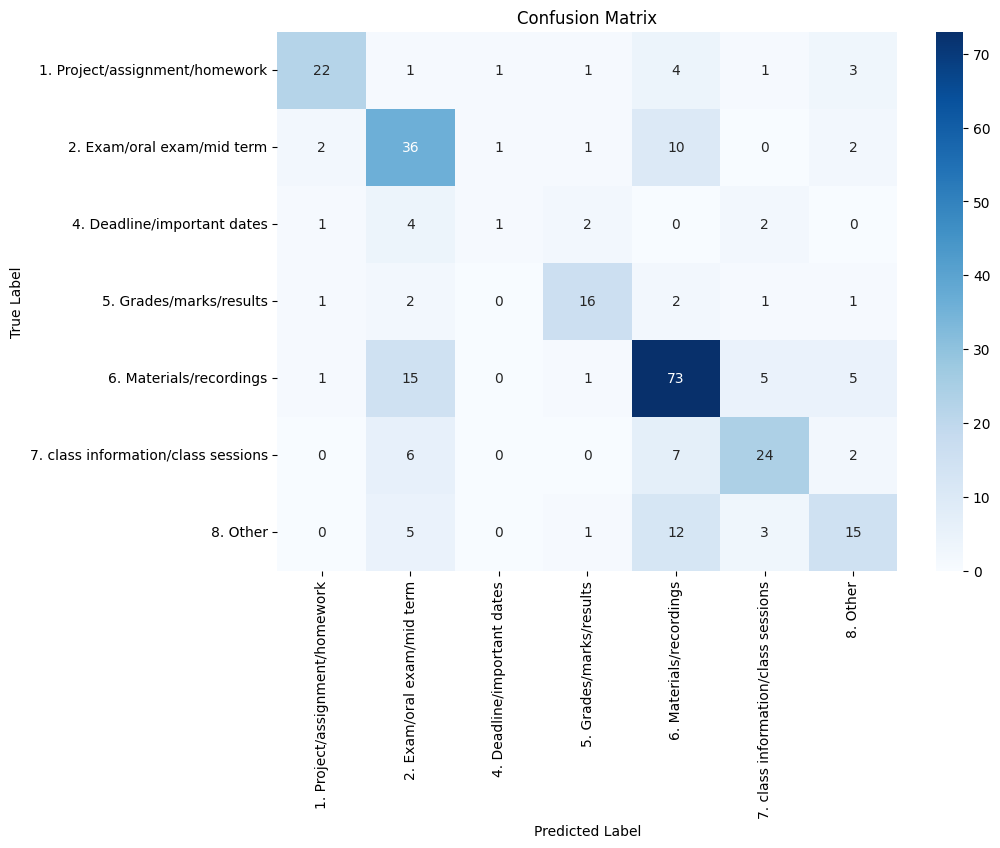

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

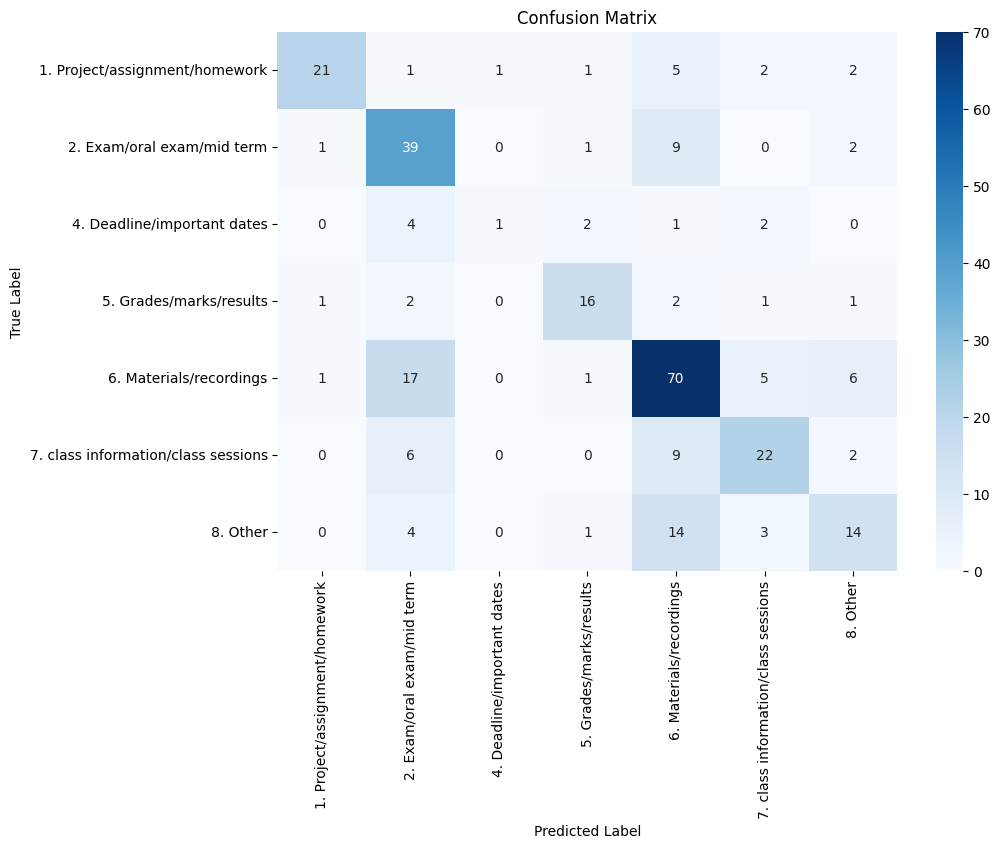

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.6314246980098251
Overall Recall: 0.5478581804668761
Overall F1-score: 0.5634750841066631
Accuracy: 0.6245733788395904
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.88      0.64      0.74        33
         2. Exam/oral exam/mid term       0.53      0.75      0.62        52
        4. Deadline/important dates       0.50      0.10      0.17        10
            5. Grades/marks/results       0.73      0.70      0.71        23
            6. Materials/recordings       0.64      0.70      0.67       100
7. class information/class sessions       0.63      0.56      0.59        39
                           8. Other       0.52      0.39      0.44        36

                           accuracy                           0.62       293
                          macro avg       0.63      0.55      0.56       293
                       weighted avg       0.63      0.62      0.62       293



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']

# Funzione di preprocessing del testo
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Applica il preprocessing al testo
X = X.apply(preprocess_text)

# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definisci il pipeline per il preprocessing e la modellazione
pipeline = ImbPipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('classifier', VotingClassifier(
        estimators=[
            ('svm', SVC(C=1, gamma=0.01, kernel='linear', class_weight='balanced')),
            ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
            ('lr', LogisticRegression(class_weight='balanced'))
        ],
        voting='hard'
    ))
])

# Definisci la griglia di iperparametri per la ricerca a griglia
param_grid = {
    'classifier__svm__C': [0.1, 1, 10],
    'classifier__svm__gamma': [1, 0.1, 0.01],
    'classifier__svm__kernel': ['rbf', 'linear'],
    'classifier__rf__n_estimators': [100, 200],
    'classifier__lr__C': [0.1, 1, 10]
}

# Ricerca a griglia con cross-validation
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

# Fai previsioni sul set di test
y_pred = grid.predict(X_test)

In [ ]:
print("Best Parameters:", grid.best_params_)

# Metodo 4

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Rimuovi le righe con valori NaN nella colonna 'text'
df_filtered = df_filtered[df_filtered['text'].notna()]

# Seleziona le colonne di testo e i topic
X = df_filtered['text']
y = df_filtered['topic']

[nltk_data] Downloading package stopwords to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Funzione di preprocessing del testo
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Applica il preprocessing al testo
X = X.apply(preprocess_text)

In [6]:
# Dividi il dataset in set di addestramento e di test in modo stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definisci il pipeline per il preprocessing e la modellazione
pipeline = ImbPipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('classifier', VotingClassifier(
        estimators=[
            ('svm', SVC(C=1, gamma=0.01, kernel='linear', class_weight='balanced')),
            ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
            ('lr', LogisticRegression(class_weight='balanced'))
        ],
        voting='hard'
    ))
])

# Definisci la griglia di iperparametri per la ricerca a griglia
param_grid = {
    'classifier__svm__C': [0.1, 1, 10],
    'classifier__svm__gamma': [1, 0.1, 0.01],
    'classifier__svm__kernel': ['rbf', 'linear'],
    'classifier__rf__n_estimators': [100, 200],
    'classifier__lr__C': [0.1, 1, 10]
}

# Ricerca a griglia con cross-validation
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

# Fai previsioni sul set di test
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [7]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'classifier__lr__C': 1, 'classifier__rf__n_estimators': 200, 'classifier__svm__C': 10, 'classifier__svm__gamma': 1, 'classifier__svm__kernel': 'linear'}


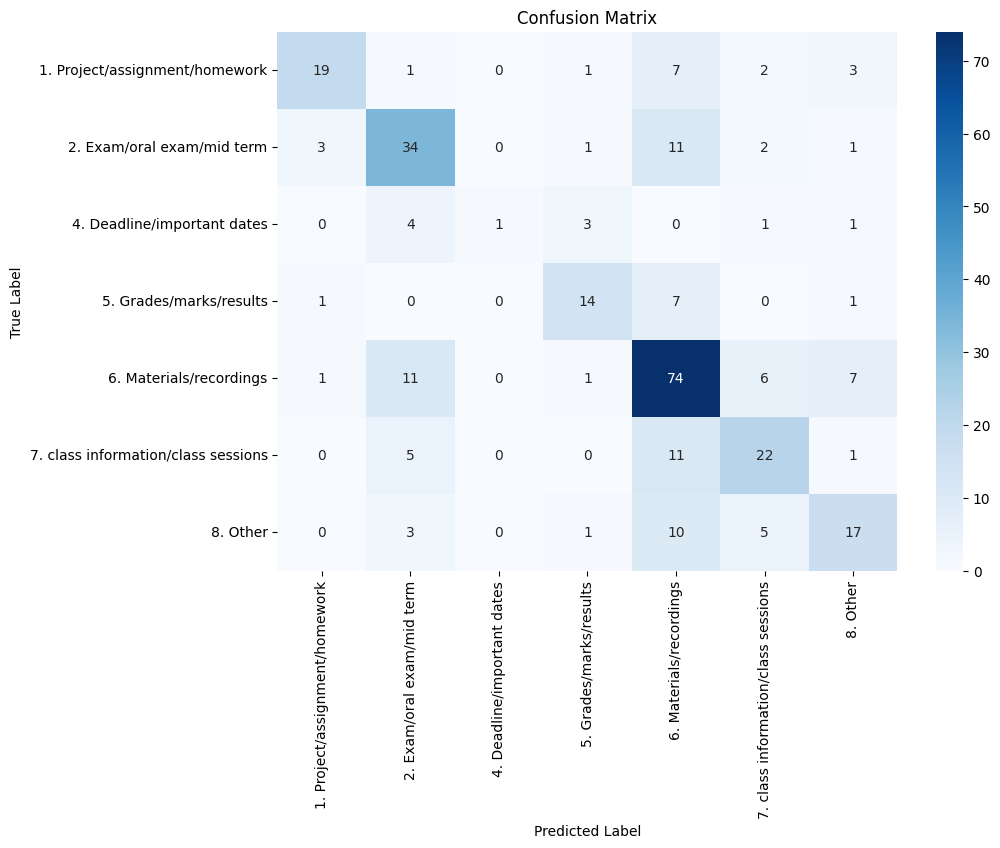

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.6840773373924244
Overall Recall: 0.5306605954432042
Overall F1-score: 0.5506641191076159
Accuracy: 0.6177474402730375
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.79      0.58      0.67        33
         2. Exam/oral exam/mid term       0.59      0.65      0.62        52
        4. Deadline/important dates       1.00      0.10      0.18        10
            5. Grades/marks/results       0.67      0.61      0.64        23
            6. Materials/recordings       0.62      0.74      0.67       100
7. class information/class sessions       0.58      0.56      0.57        39
                           8. Other       0.55      0.47      0.51        36

                           accuracy                           0.62       293
                          macro avg       0.68      0.53      0.55       293
                       weighted avg       0.63      0.62      0.61       293



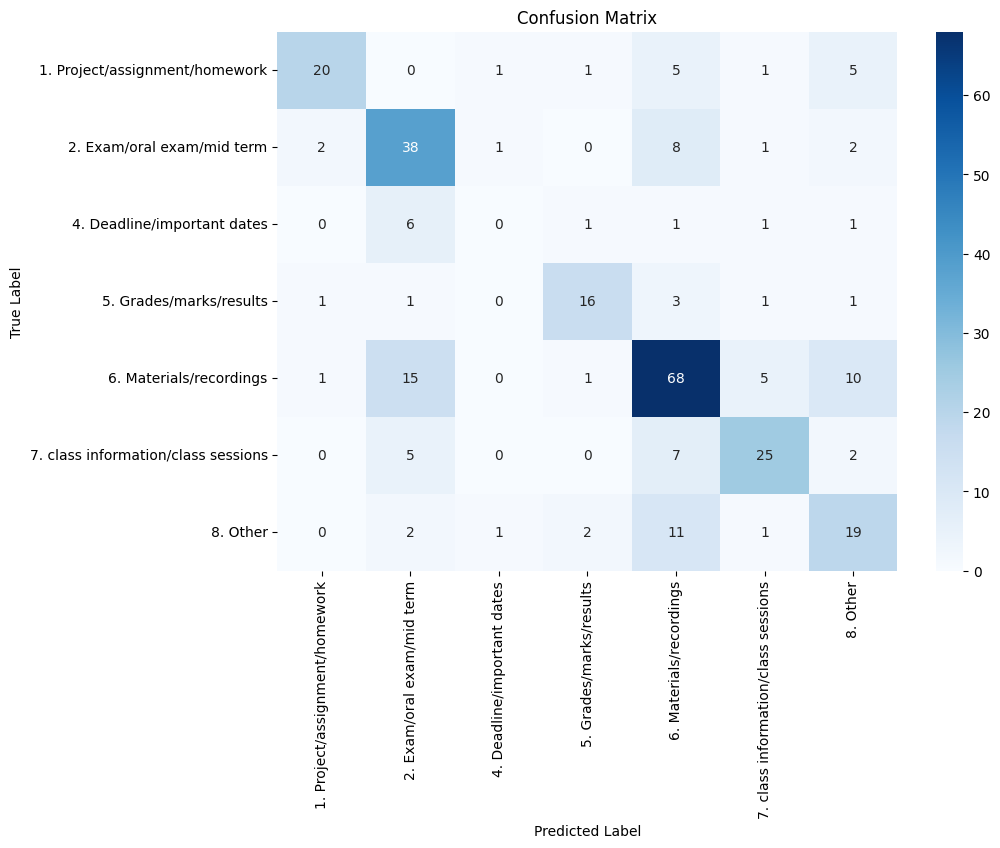

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.5731260233407955
Overall Recall: 0.5544693470780427
Overall F1-score: 0.5590441414306351
Accuracy: 0.6348122866894198
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.83      0.61      0.70        33
         2. Exam/oral exam/mid term       0.57      0.73      0.64        52
        4. Deadline/important dates       0.00      0.00      0.00        10
            5. Grades/marks/results       0.76      0.70      0.73        23
            6. Materials/recordings       0.66      0.68      0.67       100
7. class information/class sessions       0.71      0.64      0.68        39
                           8. Other       0.47      0.53      0.50        36

                           accuracy                           0.63       293
                          macro avg       0.57      0.55      0.56       293
                       weighted avg       0.63      0.63      0.63       293



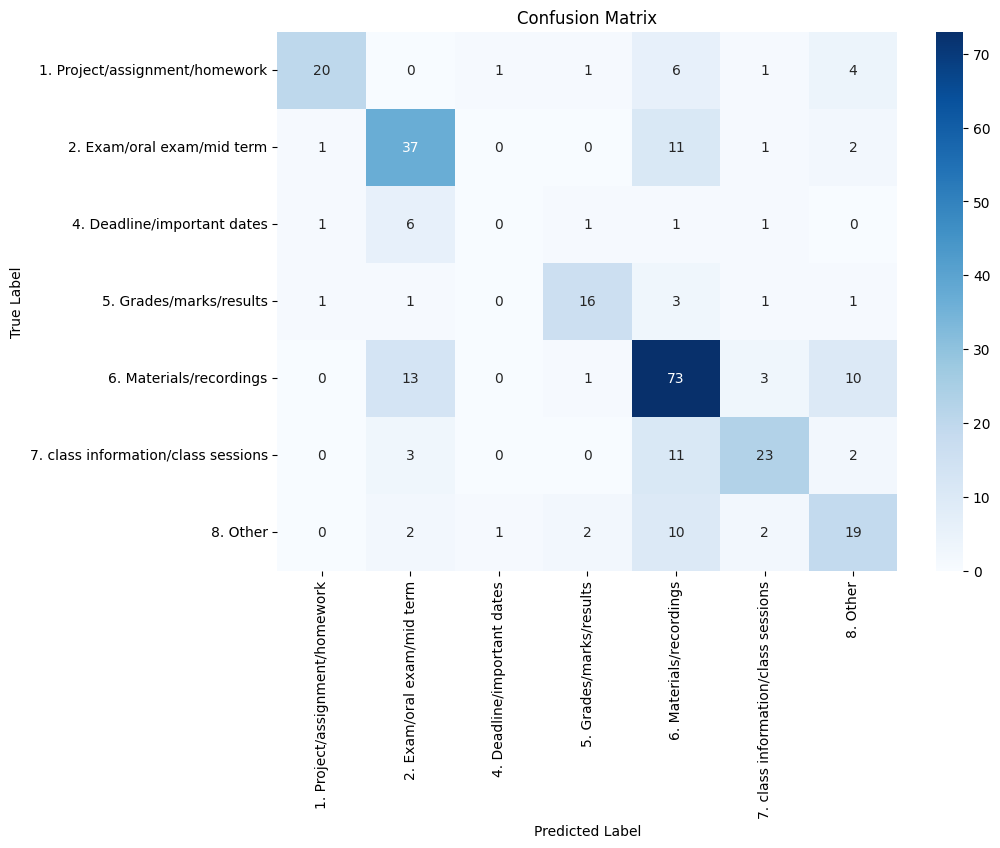

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
# Calcola le medie complessive
overall_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
overall_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
overall_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
accuracy = accuracy_score(y_test, y_pred)

# Stampa i risultati
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-score: {overall_f1}")
print(f"Accuracy: {accuracy}")
# Valuta il modello
print(classification_report(y_test, y_pred))

Overall Precision: 0.5831109687914436
Overall Recall: 0.5515389441476398
Overall F1-score: 0.5615931219250031
Accuracy: 0.6416382252559727
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.87      0.61      0.71        33
         2. Exam/oral exam/mid term       0.60      0.71      0.65        52
        4. Deadline/important dates       0.00      0.00      0.00        10
            5. Grades/marks/results       0.76      0.70      0.73        23
            6. Materials/recordings       0.63      0.73      0.68       100
7. class information/class sessions       0.72      0.59      0.65        39
                           8. Other       0.50      0.53      0.51        36

                           accuracy                           0.64       293
                          macro avg       0.58      0.55      0.56       293
                       weighted avg       0.64      0.64      0.63       293

